In [1]:
import sys
import traceback
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
import scipy.stats as stats
from metpy.cbook import get_test_data
import netCDF4 as nc  

import pyOptimalEstimation as pyOE

%matplotlib inline
sns.set(style='ticks', palette='deep')


sys.path.append('lib')
import nonScatMWRadTran
import supporting_routines

In [2]:
prior = xr.open_dataset("E:/SAMEER/pyOptimalEstimation_examples-master/pyOptimalEstimation_examples-master/data/GUWAHATI_IGRA.nc", engine='netcdf4')
prior

<xarray.Dataset>
Dimensions:   (time: 11826, height: 30)
Coordinates:
  * time      (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T15:00:00
  * height    (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 ...

In [3]:
prior.bar_pres

<xarray.DataArray 'bar_pres' (time: 11826, height: 30)>
[354780 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T15:00:00
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  Pressure in Pa
    units:      Pa

In [4]:


import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
# table1 = pd.DataFrame({'time': prior['time']})
table1= pd.DataFrame (prior.bar_pres)

# Display the table

print(table1)
table1

             0         1         2         3        4        5        6   \
0      101000.0  100000.0   93200.0   92500.0  85000.0  75800.0  70000.0   
1      100800.0  100000.0   96700.0   92500.0  85000.0  82000.0  76100.0   
2      100000.0   96000.0   92500.0   85000.0  79500.0  70000.0  63400.0   
3      100800.0  100000.0   94100.0   92500.0  85000.0  81100.0  77500.0   
4      100800.0   92800.0   92500.0   91200.0  85000.0  82400.0  75600.0   
...         ...       ...       ...       ...      ...      ...      ...   
11821  101200.0  100000.0   99900.0   97900.0  96700.0  92500.0  85000.0   
11822  100900.0  100500.0  100300.0  100000.0  99400.0  92500.0  91700.0   
11823  101000.0  100800.0  100100.0  100000.0  99500.0  98200.0  97800.0   
11824  100800.0  100000.0   92500.0   85000.0  70000.0  50000.0  40000.0   
11825  101000.0  100000.0   97900.0   94400.0  92500.0  89600.0  85000.0   

            7        8        9   ...       20       21       22       23  \
0      656

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,101000.0,100000.0,93200.0,92500.0,85000.0,75800.0,70000.0,65600.0,64300.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100800.0,100000.0,96700.0,92500.0,85000.0,82000.0,76100.0,74800.0,72400.0,70000.0,...,30200.0,30000.0,25000.0,24100.0,20000.0,15000.0,NaN,NaN,NaN,NaN
2,100000.0,96000.0,92500.0,85000.0,79500.0,70000.0,63400.0,60000.0,50000.0,46000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100800.0,100000.0,94100.0,92500.0,85000.0,81100.0,77500.0,70000.0,66900.0,65800.0,...,15300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100800.0,92800.0,92500.0,91200.0,85000.0,82400.0,75600.0,70000.0,67000.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11821,101200.0,100000.0,99900.0,97900.0,96700.0,92500.0,85000.0,81300.0,77600.0,71100.0,...,50000.0,49000.0,47000.0,45000.0,43400.0,40100.0,40000.0,37400.0,35800.0,34300.0
11822,100900.0,100500.0,100300.0,100000.0,99400.0,92500.0,91700.0,86200.0,85500.0,85000.0,...,45300.0,40800.0,40000.0,38900.0,37200.0,35700.0,34300.0,32800.0,31700.0,30000.0
11823,101000.0,100800.0,100100.0,100000.0,99500.0,98200.0,97800.0,95300.0,92500.0,90900.0,...,50000.0,49600.0,47300.0,44900.0,43900.0,42700.0,41400.0,40000.0,39500.0,37700.0
11824,100800.0,100000.0,92500.0,85000.0,70000.0,50000.0,40000.0,30000.0,25000.0,20000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


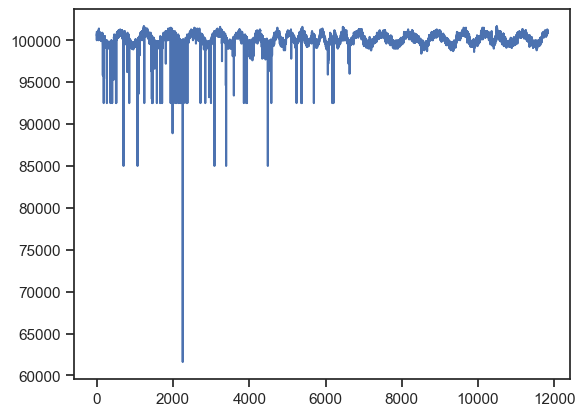

In [5]:
plt.plot(table1[0])

In [6]:
prior.q

<xarray.DataArray 'q' (time: 11826, height: 30)>
[354780 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T15:00:00
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  Relative humidity
    units:      %

In [7]:
prior.temp

<xarray.DataArray 'temp' (time: 11826, height: 30)>
[354780 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T15:00:00
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  temperature
    units:      K

In [8]:
import pandas as pd

# Specify the path to your CSV file with escaped backslashes
csv_file_path = "C:\\Users\\angsh\\Downloads\\GUWAHATI_IGRA_DATES.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


              Test_time
0      01-01-2000 00:00
1      01-01-2000 12:00
2      02-01-2000 00:00
3      02-01-2000 12:00
4      03-01-2000 00:00
...                 ...
11821  29-12-2023 00:00
11822  29-12-2023 12:00
11823  30-12-2023 00:00
11824  30-12-2023 12:00
11825  31-12-2023 00:00

[11826 rows x 1 columns]


In [9]:
import pandas as pd
import xarray as xr

# Read the CSV file into a pandas DataFrame
csv_file_path = "C:\\Users\\angsh\\Downloads\\GUWAHATI_IGRA_DATES.csv"
df = pd.read_csv(csv_file_path)

# Convert the 'Test_time' column to datetime64
df['Test_time'] = pd.to_datetime(df['Test_time'], format='%d-%m-%Y %H:%M')

# Assuming you have already loaded your data into prior
# prior: xarray.Dataset

# Make sure that df is sorted by 'Test_time'
df = df.sort_values(by='Test_time')

# If 'time' is already a coordinate in prior and you want to replace its values,
# you can use the .assign_coords() method instead of direct assignment:
prior = prior.assign_coords(time=df['Test_time'])
# prior = prior.assign_coords(time=df.index)
prior = prior.assign_coords(height=prior.height)


# Now the 'time' coordinate in prior has been replaced with the 'Test_time' values from df
prior

<xarray.Dataset>
Dimensions:   (time: 11826, height: 30)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 ... 2023-12-31
  * height    (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 1.01e+05 1e+05 9.32e+04 ... 3.13e+04 3e+04

In [10]:
import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
table = pd.DataFrame({'time': prior['time']})

# Display the table

print(table)
table

                     time
0     2000-01-01 00:00:00
1     2000-01-01 12:00:00
2     2000-01-02 00:00:00
3     2000-01-02 12:00:00
4     2000-01-03 00:00:00
...                   ...
11821 2023-12-29 00:00:00
11822 2023-12-29 12:00:00
11823 2023-12-30 00:00:00
11824 2023-12-30 12:00:00
11825 2023-12-31 00:00:00

[11826 rows x 1 columns]


,time
0,2000-01-01 00:00:00
1,2000-01-01 12:00:00
2,2000-01-02 00:00:00
3,2000-01-02 12:00:00
4,2000-01-03 00:00:00
...,...
11821,2023-12-29 00:00:00
11822,2023-12-29 12:00:00
11823,2023-12-30 00:00:00
11824,2023-12-30 12:00:00


In [11]:
prior.time

<xarray.DataArray 'time' (time: 11826)>
array(['2000-01-01T00:00:00.000000000', '2000-01-01T12:00:00.000000000',
       '2000-01-02T00:00:00.000000000', ..., '2023-12-30T00:00:00.000000000',
       '2023-12-30T12:00:00.000000000', '2023-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-31

In [12]:
prior.q

<xarray.DataArray 'q' (time: 11826, height: 30)>
[354780 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-31
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  Relative humidity
    units:      %

In [13]:
# import pandas as pd

# # Assuming 'table' is your DataFrame with a column named 'time'

# # Step 1: Get unique dates
# unique_dates = table['time'].unique()

# # Step 2: Randomly select 5 unique dates
# random_dates = pd.Series(unique_dates).sample(n=8, random_state=42)  # Set random_state for reproducibility

# print(random_dates)


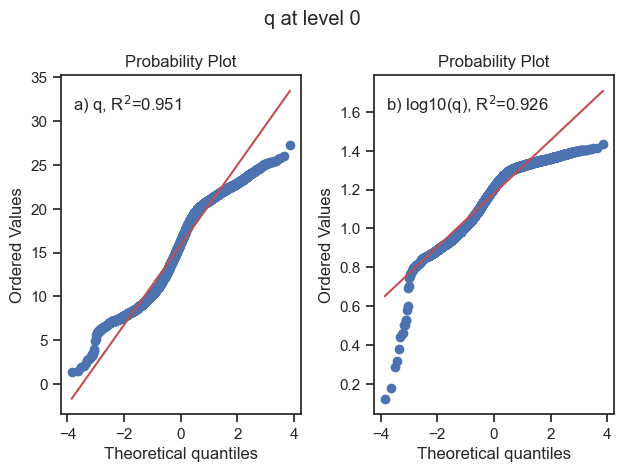

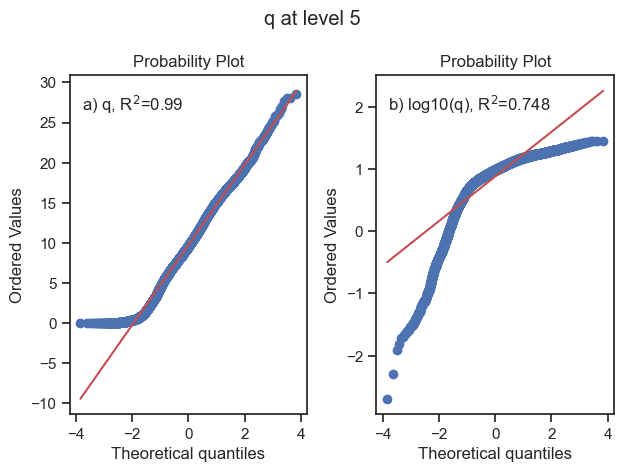

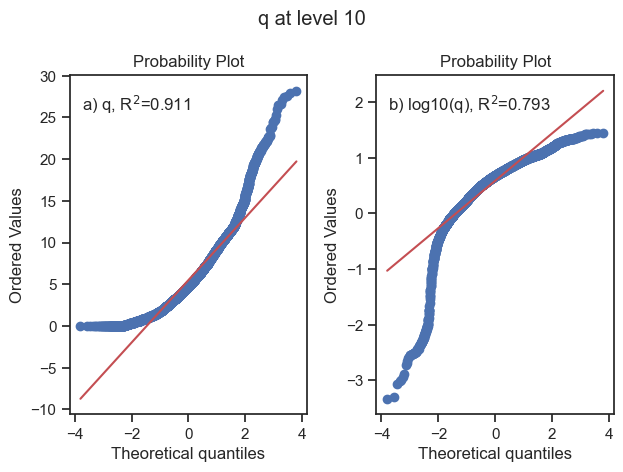

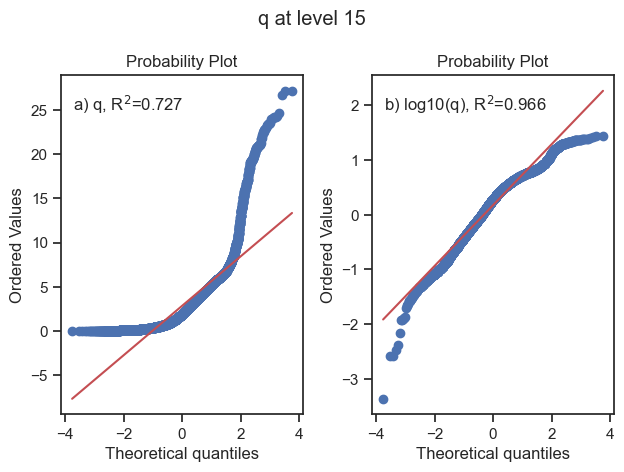

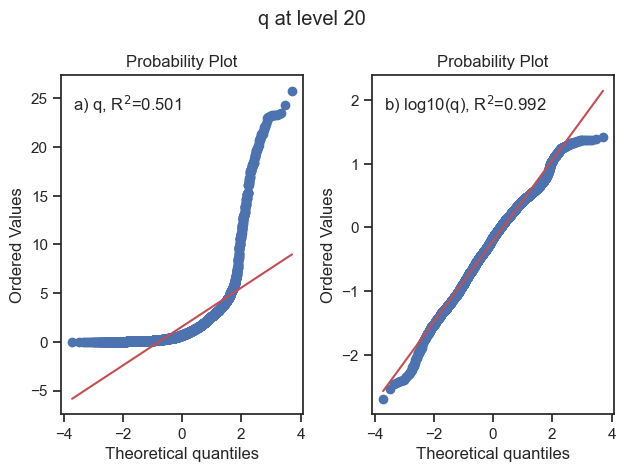

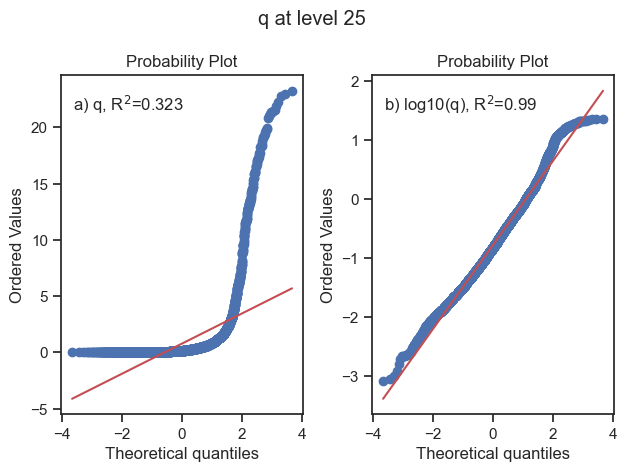

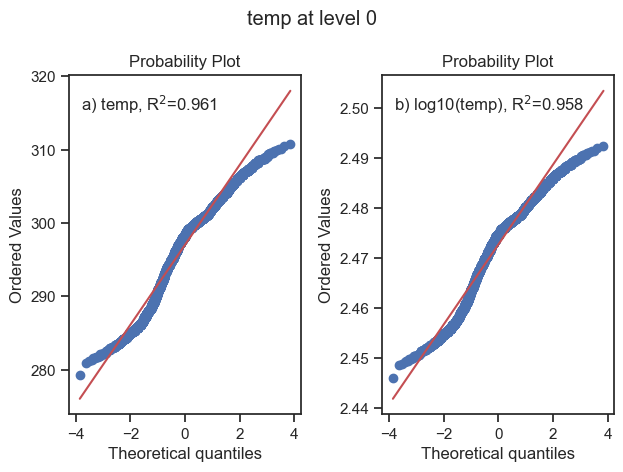

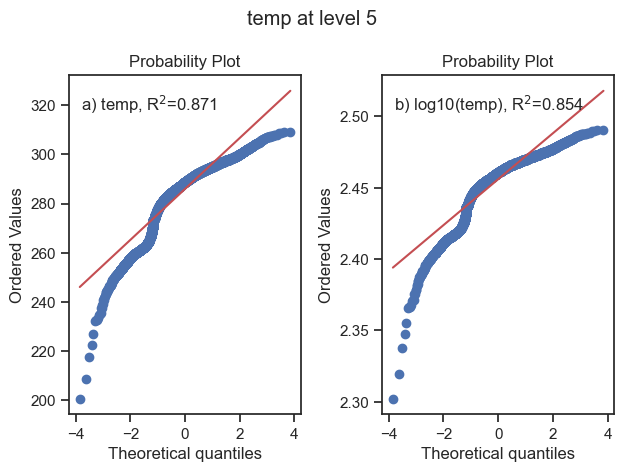

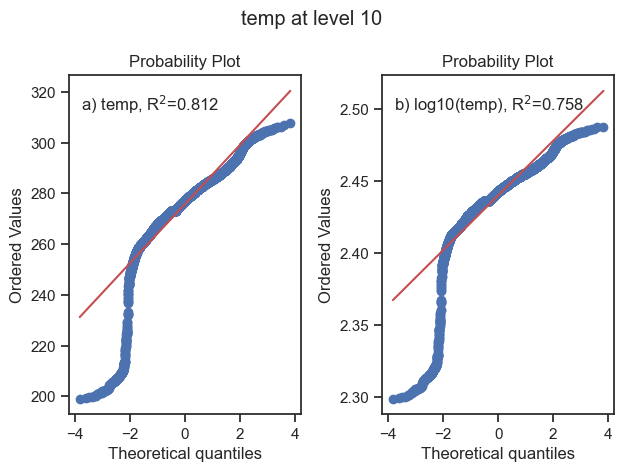

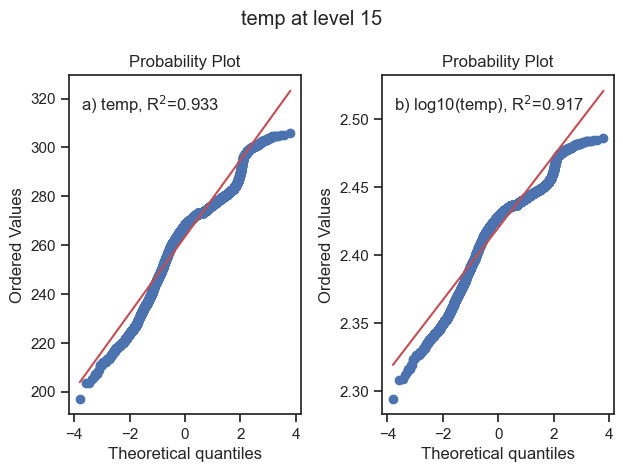

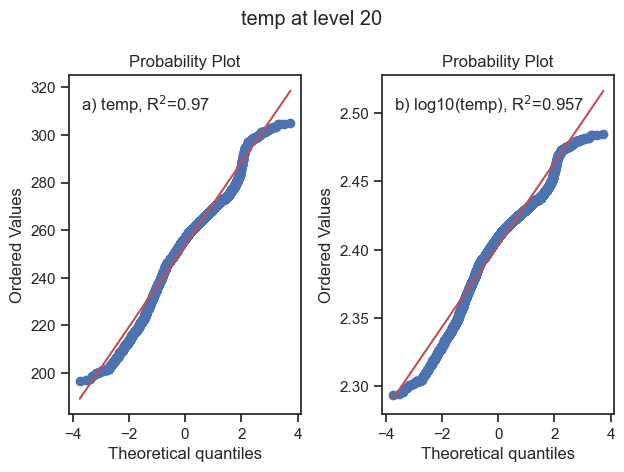

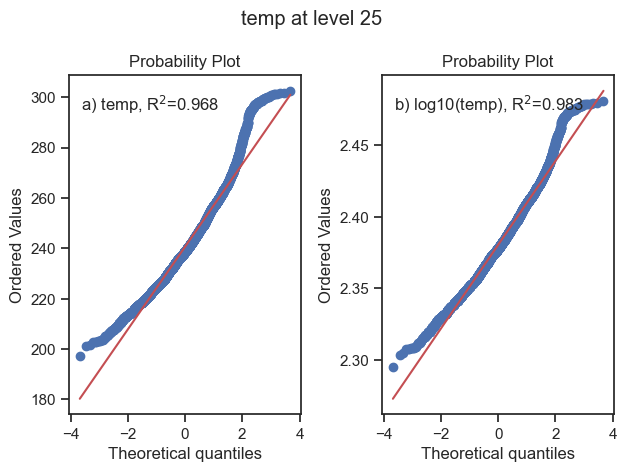

In [14]:
for var in ['q', 'temp']:
    for h in range(0, 30, 5):
        fig, (ax, ax1) = plt.subplots(ncols=2)
        plt.suptitle('%s at level %i' % (var,h))
        (osm, osr), (slope, intercept, r) = stats.probplot(
            prior[var].isel(height=h).dropna('time').values,
            dist="norm",
            plot=ax,
            fit=True,
            rvalue=False)
        ax.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('a', var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)

        (osm, osr), (slope, intercept, r) = stats.probplot(
            np.log10(prior[var].isel(height=h).dropna('time').values),
            dist="norm",
            plot=ax1,
            fit=True,
            rvalue=False)
        ax1.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('b', 'log10(%s)'%var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax1.transAxes)
        fig.tight_layout()

In [15]:
import numpy as np
import pandas as pd

# Assuming 'prior' is your pandas DataFrame
prior['q'] = np.log10(prior['q'])



In [16]:
prior['q']

<xarray.DataArray 'q' (time: 11826, height: 30)>
array([[ 0.85988164,  0.85542723,  0.88625595, ...,         nan,
                nan,         nan],
       [ 1.00493203,  1.00841897,  1.03157677, ...,         nan,
                nan,         nan],
       [ 0.86719835,  0.93174844,  0.85996049, ...,         nan,
                nan,         nan],
       ...,
       [ 0.9841452 ,  1.05824125,  1.07521619, ..., -1.09070162,
        -1.07509116, -0.9843688 ],
       [ 1.11926883,  0.96598628,  0.95963415, ...,         nan,
                nan,         nan],
       [ 1.0039861 ,  1.0672869 ,  1.09054064, ..., -0.71846742,
        -0.87367393, -0.87514448]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-31
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  Relative humidity
    units:      %

In [17]:
profileTT = np.array([
    '2017-03-28T12:00:00.000000000','2016-06-08T00:00:00.000000000',
    '2023-08-20T00:00:00.000000000','2011-05-03T12:00:00.000000000'
],dtype='datetime64[ns]')
profiles = prior.sel(time=profileTT)
prior = prior.drop_sel(time=profileTT)
nLev = len(prior.height)
nLev

# '2005-01-21T12:00:00.000000000',
#     '2015-04-12T00:00:00.000000000',
#     '2020-07-03T12:00:00.000000000',
#     '2023-09-27T00:00:00.000000000'



30

In [18]:
priors = {'all': prior}

seasons = [
    'DJF',  # Winter (December-January-February)
    'MAM',  # Spring (March-April-May)
    'JJA',  # Summer (June-July-August)
    'SON',  # Autumn (September-October-November)
]
months = (
    [12, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
)
for season, month in zip(seasons, months):
    priors[season] = prior.where(
        np.in1d(prior['time.month'], month)[:, np.newaxis]).dropna(
            'time', how='all')

In [19]:
# prior_qts = {}
# for season in priors.keys():
#     prior_q = priors[season]['q'].to_pandas()
#     prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
#     prior_t = priors[season]['temp'].to_pandas()
#     prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
#     prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
#     prior_qts[season] = prior_qts[season].reindex(
#         sorted(prior_qts[season].columns), axis=1)

# prior_qts

prior_qts = {}
for season in priors.keys():
    prior_q = priors[season]['q'].to_pandas()
    prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
    prior_t = priors[season]['temp'].to_pandas()
    prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
    prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
    prior_qts[season] = prior_qts[season].reindex(
        sorted(prior_qts[season].columns), axis=1)

prior_qts

{'all':                       00000_q  00000_t   00188_q  00188_t   00508_q  00508_t  \
 time                                                                           
 2000-01-01 00:00:00  0.859882   282.95  0.855427   283.75  0.886256   288.15   
 2000-01-01 12:00:00  1.004932   290.95  1.008419   291.15  1.031577   291.95   
 2000-01-02 00:00:00  0.867198   284.75  0.931748   288.75  0.859960   286.15   
 2000-01-02 12:00:00  0.922143   293.55  0.902425   292.75  0.940486   289.15   
 2000-01-03 00:00:00  0.854868   282.75  0.864468   285.95  0.830197   286.15   
 ...                       ...      ...       ...      ...       ...      ...   
 2023-12-29 00:00:00  0.983281   287.55  1.053364   290.55  1.053802   290.55   
 2023-12-29 12:00:00  1.124297   296.75  1.172356   297.75  1.148811   298.55   
 2023-12-30 00:00:00  0.984145   287.55  1.058241   290.15  1.075216   290.75   
 2023-12-30 12:00:00  1.119269   297.55  0.965986   298.95  0.959634   292.55   
 2023-12-31 00:00:00 

In [20]:
x_cov = []
x_mean = []

for season in ['all'] + seasons:

    x_cov1 = prior_qts[season].cov().rename_axis('state', axis=0).rename_axis('stateT', axis=1)
    x_mean1 = prior_qts[season].mean().rename_axis('state', axis=0)

    x_cov.append(xr.DataArray(x_cov1))
    x_mean.append(xr.DataArray(x_mean1))

x_cov = xr.concat(x_cov, dim='season')
x_mean = xr.concat(x_mean, dim='season')

x_cov['season'] = ['all'] + seasons
x_mean['season'] = ['all'] + seasons

In [21]:
for season in x_cov.season:
    assert np.linalg.matrix_rank(x_cov.sel(season=season).to_pandas()) ==  x_cov.shape[-1]

Text(0, 0.5, 'Height [m]')

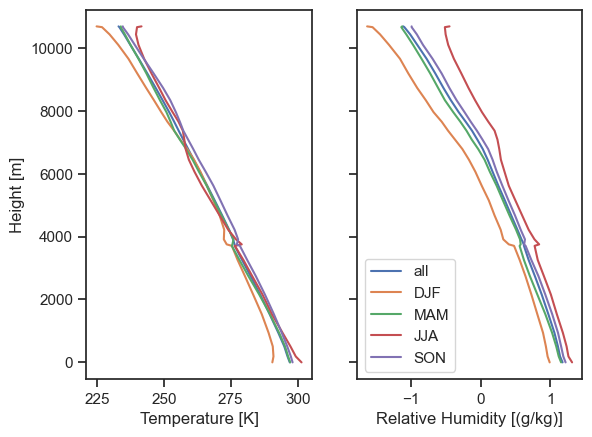

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for season in ['all'] + seasons:
    t, q = supporting_routines.splitTQ(x_mean.sel(season=season).to_pandas())
    ax1.plot(t, t.index, label=season)
    ax2.plot(q, q.index, label=season)

ax2.legend()
ax1.set_xlabel('Temperature [K]')
ax2.set_xlabel('Relative Humidity [(g/kg)]')
ax1.set_ylabel('Height [m]')

Text(0.5, 1.0, '$\\mathbb{S}_{a}$ Humidity')

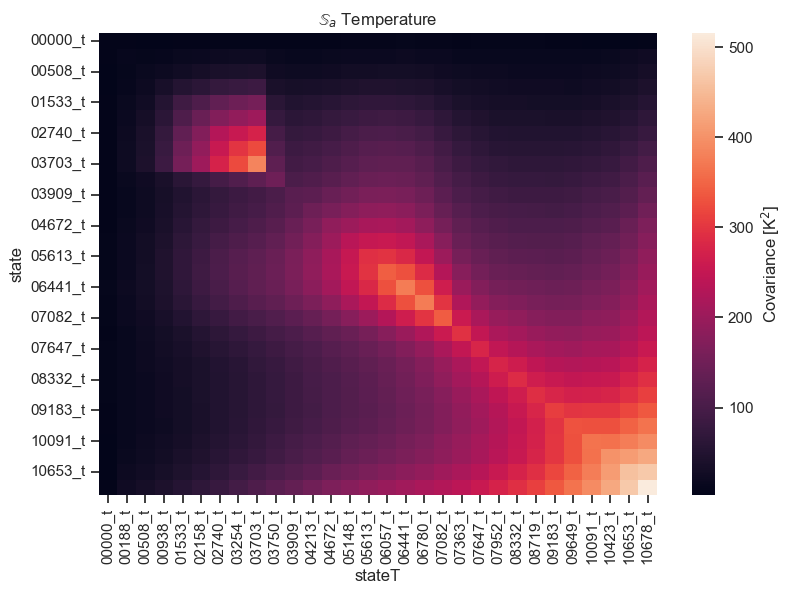

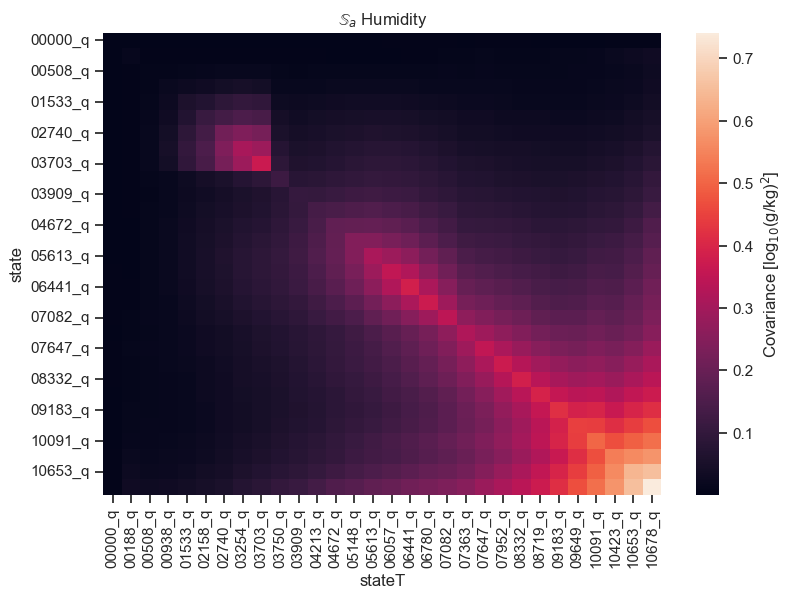

In [23]:
S_a = x_cov.sel(season='JJA').to_pandas()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Temperature')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Humidity')

In [24]:
height = priors['all'].height

pressure = []
for k in ['all'] + seasons:
    pressure.append(priors[k].bar_pres.mean('time'))
pressure = xr.concat(pressure, dim='season')
pressure['season'] = ['all'] + seasons
pressure = pressure.to_pandas()
pressure

height,0.000000,188.645435,508.012873,938.674662,1533.684421,2158.056688,2740.022060,3254.597677,3703.183007,3750.661827,...,7647.042982,7952.135234,8332.292435,8719.182545,9183.720944,9649.467170,10091.314936,10423.866535,10653.872794,10678.708233
season,,,,,,,,,,,,,,,,,,,,,
all,100123.572999,98045.436088,94591.036059,90230.005086,84753.615790,79458.270548,74855.201863,70940.722682,67566.059005,66397.657993,...,40787.181518,39080.805820,37092.177869,35157.919111,33009.634284,30984.629724,29183.482714,27923.604531,27148.956543,27252.231719
DJF,100747.052197,99865.039429,96959.172932,93445.054532,88794.155354,83680.402583,79538.688650,75941.099071,72886.528700,70045.874457,...,42037.526652,39805.652911,37415.902323,35050.750939,32493.259162,30063.636364,27553.012912,25498.127925,23864.784946,22896.342857
MAM,100071.745236,98174.055500,94544.734203,90152.899765,84596.530818,79012.983051,74293.574846,70397.474922,67125.789474,66310.557844,...,40977.112299,39561.983945,37615.830816,35838.658147,33825.514950,31772.075209,29858.976261,28567.187500,27828.599034,28061.179361
JJA,99470.715898,95576.419355,91808.941252,86401.810540,79951.594014,74676.204523,69792.325504,65667.703109,61933.310719,62407.564923,...,37782.542373,36166.587678,34416.019717,32917.957059,31303.150685,29943.433602,29107.493755,28936.127745,29610.038119,31052.622673
SON,100292.859472,98835.670036,95393.050571,91379.791055,86228.702190,81029.776756,76414.958814,72405.167274,68979.405874,66947.292170,...,42058.377853,40517.770930,38671.728595,36591.394826,34207.176196,31982.672361,30137.270341,28892.103321,28051.894273,28283.959044


In [25]:
import numpy as np
import pandas as pd

#Assuming profiles is an xarray Dataset or DataArray
profiles_t = profiles['temp'].to_pandas()
profiles_t
# # Proceed with the rest of the code as before
profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
profiles_q = profiles['q'].to_pandas()
profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]
x_truths = pd.concat((profiles_t, profiles_q), axis=1)
x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
x_truths.columns.name = 'state'
x_truths.index.name = 'time'

# assert np.all(np.isfinite(x_truths))
x_truths



# import numpy as np
# import pandas as pd

# profiles_t = profiles['temp'].to_pandas()
# profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
# profiles_q = profiles['q'].to_pandas()
# profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]

# x_truths = pd.concat((profiles_t, profiles_q), axis=1)
# x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
# # x_truths = np.nan_to_num(x_truths) 
# x_truths
# x_truths.columns.name = 'state'
# x_truths.index.name = 'time'

# # Replace missing values with mean
# x_truths_filled = x_truths.fillna(x_truths.mean())

# # Check for infinite values
# infinite_values = not np.all(np.isfinite(x_truths_filled.values))
# print("Infinite Values Present after filling missing values:", infinite_values)

# # Ensure all values are finite
# assert np.all(np.isfinite(x_truths_filled)), "Not all values are finite after filling missing values"

# # Now x_truths_filled can be used without any infinite or missing values

# # assert np.all(np.isfinite(x_truths))
# x_truths

state,00000_t,00188_t,00508_t,00938_t,01533_t,02158_t,02740_t,03254_t,03703_t,03750_t,...,07647_q,07952_q,08332_q,08719_q,09183_q,09649_q,10091_q,10423_q,10653_q,10678_q
time,,,,,,,,,,,,,,,,,,,,,
2011-05-03 12:00:00,298.75,298.55,295.35,294.95,293.75,292.95,289.75,287.15,285.35,286.15,...,0.258058,0.209953,0.018673,-0.039021,-0.163694,-0.250141,-0.244736,-0.289275,-0.383915,-0.212659
2016-06-08 00:00:00,298.35,297.75,297.15,298.75,298.35,296.15,296.15,291.95,284.15,280.55,...,0.179491,-0.146199,-0.456905,-0.473620,-0.437617,-0.749547,-0.809425,-0.825997,-1.258330,-1.191544
2017-03-28 12:00:00,300.95,299.75,298.75,298.75,295.95,294.55,294.55,290.35,290.75,289.15,...,-0.349608,-0.632079,-0.735141,-0.915144,-1.072982,-1.345010,-1.343869,-1.474991,-1.656775,-1.731096
2023-08-20 00:00:00,301.15,301.95,301.35,302.95,302.95,301.35,299.75,300.75,301.55,299.95,...,1.177746,1.150467,1.157476,1.148835,1.122148,1.107252,1.103372,1.080426,1.048628,0.961091


In [26]:
# x_truths_filled = x_truths.interpolate(method='linear', axis=1, limit_direction='both')  # Interpolate NaN values along columns using linear interpolation
# # print(x_truths_filled)
# x_truths=x_truths_filled
# x_truths

assert np.all(np.isfinite(x_truths))
x_truths

state,00000_t,00188_t,00508_t,00938_t,01533_t,02158_t,02740_t,03254_t,03703_t,03750_t,...,07647_q,07952_q,08332_q,08719_q,09183_q,09649_q,10091_q,10423_q,10653_q,10678_q
time,,,,,,,,,,,,,,,,,,,,,
2011-05-03 12:00:00,298.75,298.55,295.35,294.95,293.75,292.95,289.75,287.15,285.35,286.15,...,0.258058,0.209953,0.018673,-0.039021,-0.163694,-0.250141,-0.244736,-0.289275,-0.383915,-0.212659
2016-06-08 00:00:00,298.35,297.75,297.15,298.75,298.35,296.15,296.15,291.95,284.15,280.55,...,0.179491,-0.146199,-0.456905,-0.473620,-0.437617,-0.749547,-0.809425,-0.825997,-1.258330,-1.191544
2017-03-28 12:00:00,300.95,299.75,298.75,298.75,295.95,294.55,294.55,290.35,290.75,289.15,...,-0.349608,-0.632079,-0.735141,-0.915144,-1.072982,-1.345010,-1.343869,-1.474991,-1.656775,-1.731096
2023-08-20 00:00:00,301.15,301.95,301.35,302.95,302.95,301.35,299.75,300.75,301.55,299.95,...,1.177746,1.150467,1.157476,1.148835,1.122148,1.107252,1.103372,1.080426,1.048628,0.961091


In [27]:
# def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):
#     # Convert X to a pandas DataFrame or Series object if it's a numpy array
#     if isinstance(X, np.ndarray):
#         X = pd.Series(X, index=[f'{i}_t' for i in pd.date_range(start='2015-09-21T12:00:00.000000000', periods=len(X), freq='D')])

#     # X contains T and Q, lets split the vector
#     t_index, q_index = supporting_routines.splitTQ(X)
#     # humidity is in log10 scale, convert to linear in kg/kg
#     temperature, humidity = supporting_routines.splitTQ(X)
#     humidity = (10**humidity) / 1000.  # Assign humidity before using it
#     # Height in meters comes from index of the temperature (or humidity) vector
#     heights = temperature.index
#     assert np.all(np.diff(heights) > 0)

#     # get absolute humidity from specific humidity
#     abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
#     # run the forward operator
#     TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
#         heights,  # [m]  
#         temperature,  # [K]
#         pressure,  # [Pa]
#         abs_humidity,  # [kgm^-3]
#         zenithAngle,  # zenith angle of observation in deg.
#         frequencies,  # frequency vector in GHz
#     )
#     return TB


In [28]:
def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):

    # X contains T and Q, lets split the vector
    temperature, humidity = supporting_routines.splitTQ(X)
    # humdity is in log10 scale, convert to linear in kg/kg
#     humidity = (10**humidity) / 1000.
    # Height in meters comes from index of the temperature (or humidty) vector
    heights = temperature.index
    assert np.all(np.diff(heights) > 0)

    # get absolute humidty from specific humdity
    abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
    # run the forward operator
    TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
        heights,  # [m]  
        temperature,  # [K]
        pressure,  # [Pa]
        abs_humidity,  # [kgm^-3]
        zenithAngle,  # zenith angle of observation in deg.
        frequencies,  # frequency vector in GHz
    )
    return TB

In [29]:
frequencies = [ 
   22.24, 23.04, 23.84, 25.44, 26.24, 27.84, 31.4, 51.26, 52.28, 53.86, 54.94,
    56.66, 57.3, 58.
]

# 22.23 
# 23.03 
# 23.83
# 26.23
# 30. 
# 51.25 
# 52.280
# 53.85
# 54.94 
# 56.66 
# 57.29
# 58.8
# 59.4 
# 60. 



In [30]:
y_vars = np.array(frequencies)
x_vars = x_mean.state.values
print('y_vars:\n', y_vars)
print('x_vars:\n', x_vars)

y_vars:
 [22.24 23.04 23.84 25.44 26.24 27.84 31.4  51.26 52.28 53.86 54.94 56.66
 57.3  58.  ]
x_vars:
 ['00000_q' '00000_t' '00188_q' '00188_t' '00508_q' '00508_t' '00938_q'
 '00938_t' '01533_q' '01533_t' '02158_q' '02158_t' '02740_q' '02740_t'
 '03254_q' '03254_t' '03703_q' '03703_t' '03750_q' '03750_t' '03909_q'
 '03909_t' '04213_q' '04213_t' '04672_q' '04672_t' '05148_q' '05148_t'
 '05613_q' '05613_t' '06057_q' '06057_t' '06441_q' '06441_t' '06780_q'
 '06780_t' '07082_q' '07082_t' '07363_q' '07363_t' '07647_q' '07647_t'
 '07952_q' '07952_t' '08332_q' '08332_t' '08719_q' '08719_t' '09183_q'
 '09183_t' '09649_q' '09649_t' '10091_q' '10091_t' '10423_q' '10423_t'
 '10653_q' '10653_t' '10678_q' '10678_t']


In [31]:
season = 'JJA'  #SUMMER: SEPT OCT NOV
profile = np.datetime64('2016-06-08T00:00:00.000000000')
x_truth = x_truths.loc[profile]
x_truth

state
00000_t    298.350000
00188_t    297.750000
00508_t    297.150000
00938_t    298.750000
01533_t    298.350000
02158_t    296.150000
02740_t    296.150000
03254_t    291.950000
03703_t    284.150000
03750_t    280.550000
03909_t    271.850000
04213_t    271.450000
04672_t    271.250000
05148_t    270.450000
05613_t    267.050000
06057_t    265.450000
06441_t    264.850000
06780_t    260.850000
07082_t    260.050000
07363_t    257.250000
07647_t    254.850000
07952_t    253.250000
08332_t    249.450000
08719_t    246.650000
09183_t    244.050000
09649_t    243.250000
10091_t    236.050000
10423_t    235.650000
10653_t    223.650000
10678_t    221.450000
00000_q      1.281785
00188_q      1.246489
00508_q      1.228687
00938_q      1.261195
01533_q      1.246235
02158_q      1.232983
02740_q      1.234408
03254_q      1.157928
03703_q      0.987505
03750_q      0.849990
03909_q      0.523575
04213_q      0.377676
04672_q      0.373924
05148_q      0.529329
05613_q     -0.372010
0605

In [32]:
y_noise = pd.Series(
    [
        0.12026637, 0.10864162, 0.10412012, 0.0918477, 0.10174478, 0.10085633,
        0.10500476, 0.42303663, 0.45658514, 0.26291823, 0.25538793, 0.1773584,
        0.17556195, 0.59489495
    ],
    index=y_vars
)

S_y = pd.DataFrame(
    np.diag(y_noise.values**2),
    index=y_vars,
    columns=y_vars,
)


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$')

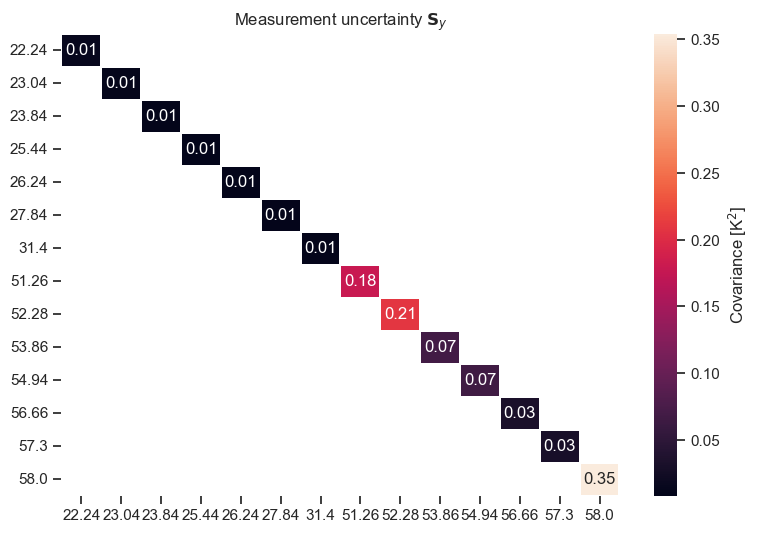

In [33]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_y.where(S_y > 0), 
    annot=True, 
    fmt='.2f', 
    ax=ax, 
    linewidths=.05, 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$')

In [34]:
x_a = x_mean.sel(season='JJA').to_pandas()[x_vars]
S_a = x_cov.sel(season='JJA').to_pandas().loc[x_vars, x_vars]

In [35]:
singularMatrix = np.array([[1,0,0], [1,0,1e-50], [1,1e-50,0]])
np.linalg.inv(singularMatrix)

array([[ 1.e+00,  0.e+00,  0.e+00],
       [-1.e+50,  0.e+00,  1.e+50],
       [-1.e+50,  1.e+50,  0.e+00]])

In [36]:
x_truth

state
00000_t    298.350000
00188_t    297.750000
00508_t    297.150000
00938_t    298.750000
01533_t    298.350000
02158_t    296.150000
02740_t    296.150000
03254_t    291.950000
03703_t    284.150000
03750_t    280.550000
03909_t    271.850000
04213_t    271.450000
04672_t    271.250000
05148_t    270.450000
05613_t    267.050000
06057_t    265.450000
06441_t    264.850000
06780_t    260.850000
07082_t    260.050000
07363_t    257.250000
07647_t    254.850000
07952_t    253.250000
08332_t    249.450000
08719_t    246.650000
09183_t    244.050000
09649_t    243.250000
10091_t    236.050000
10423_t    235.650000
10653_t    223.650000
10678_t    221.450000
00000_q      1.281785
00188_q      1.246489
00508_q      1.228687
00938_q      1.261195
01533_q      1.246235
02158_q      1.232983
02740_q      1.234408
03254_q      1.157928
03703_q      0.987505
03750_q      0.849990
03909_q      0.523575
04213_q      0.377676
04672_q      0.373924
05148_q      0.529329
05613_q     -0.372010
0605

In [37]:
import pandas as pd

# Assuming 'series' is your pandas Series
has_nan = x_truth.isna().any()

# Print whether there are NaN values
print("Are there any NaN values in the series?", has_nan)


Are there any NaN values in the series? False


In [38]:
try:
    pyOE.invertMatrix(singularMatrix)
except Exception as err:
    traceback.print_tb(err.__traceback__)

  File "C:\Users\angsh\AppData\Local\Temp\ipykernel_17580\384370707.py", line 2, in <module>
    pyOE.invertMatrix(singularMatrix)
  File "C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py", line 1485, in invertMatrix
    raise ValueError("Found singular matrix", UserWarning)


In [39]:
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [40]:
x_truth

state
00000_t    298.350000
00188_t    297.750000
00508_t    297.150000
00938_t    298.750000
01533_t    298.350000
02158_t    296.150000
02740_t    296.150000
03254_t    291.950000
03703_t    284.150000
03750_t    280.550000
03909_t    271.850000
04213_t    271.450000
04672_t    271.250000
05148_t    270.450000
05613_t    267.050000
06057_t    265.450000
06441_t    264.850000
06780_t    260.850000
07082_t    260.050000
07363_t    257.250000
07647_t    254.850000
07952_t    253.250000
08332_t    249.450000
08719_t    246.650000
09183_t    244.050000
09649_t    243.250000
10091_t    236.050000
10423_t    235.650000
10653_t    223.650000
10678_t    221.450000
00000_q      1.281785
00188_q      1.246489
00508_q      1.228687
00938_q      1.261195
01533_q      1.246235
02158_q      1.232983
02740_q      1.234408
03254_q      1.157928
03703_q      0.987505
03750_q      0.849990
03909_q      0.523575
04213_q      0.377676
04672_q      0.373924
05148_q      0.529329
05613_q     -0.372010
0605

In [41]:
# forwardKwArgs = dict(
#     pressure=pressure.loc['SON'].values,
#     zenithAngle=0,
#     frequencies=frequencies
# )

y_obs = forwardRT(x_truth, **forwardKwArgs)
y_obs = pd.Series(y_obs, index=y_vars)
assert np.all(np.isfinite(y_obs))

warning, negative absorption coefficient
warning, negative absorption coefficient


In [42]:
oe_ref = pyOE.optimalEstimation(
    x_vars,       # state variable names
    x_a,          # a priori
    S_a,          # a priori uncertainty
    y_vars,       # measurement variable names
    y_obs,        # observations
    S_y,      # observation uncertainty
    forwardRT,    # forward Operator
    forwardKwArgs=forwardKwArgs,  # additional function arguments
    x_truth=x_truth,              # true profile
)


In [43]:
oe_ref.doRetrieval()

0.37 s, iteration 1, degrees of freedom: 2.19 of 60, converged (x-space):  0.349


0.52 s, iteration 2, degrees of freedom: 2.19 of 60, done.  0.000


True

In [44]:
print(oe_ref.x_op[:10])
print(oe_ref.S_op[:10])

00000_q      1.298118
00000_t    298.339875
00188_q      1.263192
00188_t    297.832123
00508_q      1.230281
00508_t    296.179714
00938_q      1.182809
00938_t    293.788957
01533_q      1.115494
01533_t    290.356055
dtype: float64
          00000_q   00000_t   00188_q   00188_t   00508_q   00508_t   00938_q  \
00000_q  0.002192  0.000174  0.000258 -0.001244  0.000691  0.002715  0.000556   
00000_t  0.000174  0.014595 -0.001518 -0.032042  0.001151  0.064803  0.001987   
00188_q  0.000258 -0.001518  0.007915  0.004227  0.002456 -0.055006  0.000704   
00188_t -0.001244 -0.032042  0.004227  0.100667 -0.008222 -0.403657 -0.012947   
00508_q  0.000691  0.001151  0.002456 -0.008222  0.005594  0.073517  0.004745   
00508_t  0.002715  0.064803 -0.055006 -0.403657  0.073517  4.495954  0.126080   
00938_q  0.000556  0.001987  0.000704 -0.012947  0.004745  0.126080  0.013539   
00938_t  0.009736  0.100934 -0.094363 -0.620888  0.105103  6.655726  0.353150   
01533_q  0.000728  0.003071 -0.00137

In [45]:
print(oe_ref.x_op_err[:10])

00000_q    0.046824
00000_t    0.120810
00188_q    0.088968
00188_t    0.317281
00508_q    0.074790
00508_t    2.120366
00938_q    0.116357
00938_t    4.306543
01533_q    0.206776
01533_t    7.627195
dtype: float64


In [46]:
print('total', oe_ref.dgf)
print(oe_ref.dgf_x[:10])

total 2.189558288538575
00000_q    0.000171
00000_t    0.994741
00188_q    0.005791
00188_t    0.915462
00508_q    0.003582
00508_t    0.251055
00938_q    0.000386
00938_t    0.017911
01533_q    0.000016
01533_t    0.000439
dtype: float64


In [47]:
help(oe_ref)

Help on optimalEstimation in module pyOptimalEstimation.pyOEcore object:

class optimalEstimation(builtins.object)
 |  optimalEstimation(x_vars, x_a, S_a, y_vars, y_obs, S_y, forward, userJacobian=None, x_truth=None, b_vars=[], b_p=[], S_b=[[]], x_lowerLimit={}, x_upperLimit={}, useFactorInJac=False, gammaFactor=None, perturbation=0.1, disturbance=None, convergenceFactor=10, convergenceTest='x', forwardKwArgs={}, multipleForwardKwArgs=None, verbose=None)
 |  
 |  The core optimalEstimation class, which contains all required parameters.
 |  See [1]_ for an extensive introduction into Optimal Estimation theory, 
 |  [2]_ discusses this library
 |  
 |  Parameters
 |  ----------
 |  x_vars : list of str
 |      names of the elements of state vector x.
 |  x_a : pd.Series or list or np.ndarray
 |      prior information of state x.
 |  S_a : pd.DataFrame or list or np.ndarray
 |      covariance matrix of state x.
 |  y_vars : list of str
 |      names of the elements of state vector x
 |  y

C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py:1339: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sp4.set_xticklabels(xlabels)


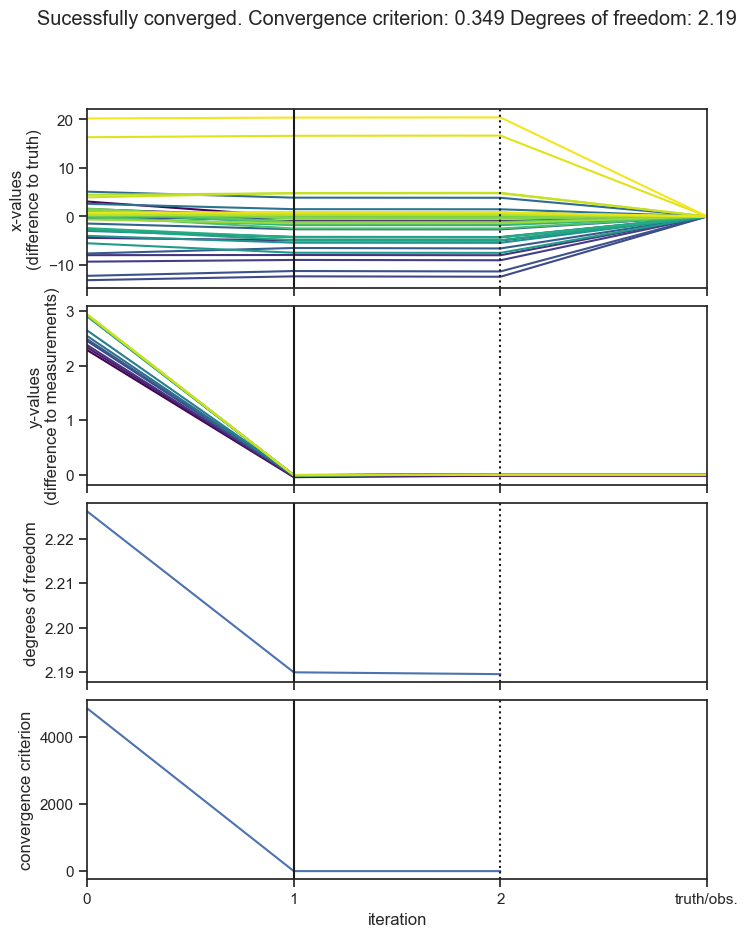

In [48]:
fig = oe_ref.plotIterations(legend=False, mode='difference')

In [49]:
oe_ref.x_op

00000_q      1.298118
00000_t    298.339875
00188_q      1.263192
00188_t    297.832123
00508_q      1.230281
00508_t    296.179714
00938_q      1.182809
00938_t    293.788957
01533_q      1.115494
01533_t    290.356055
02158_q      1.037736
02158_t    287.121206
02740_q      0.964186
02740_t    283.724230
03254_q      0.885553
03254_t    280.612400
03703_q      0.843563
03703_t    277.553512
03750_q      0.831419
03750_t    277.879602
03909_q      0.759352
03909_t    275.699467
04213_q      0.687744
04213_t    272.926599
04672_q      0.596392
04672_t    269.645504
05148_q      0.486019
05148_t    266.145508
05613_q      0.380862
05613_t    262.814344
06057_q      0.301911
06057_t    260.014483
06441_q      0.243412
06441_t    257.344953
06780_q      0.225305
06780_t    255.954804
07082_q      0.211312
07082_t    255.736629
07363_q      0.176661
07363_t    255.443499
07647_q      0.053090
07647_t    253.544231
07952_q     -0.047459
07952_t    250.775367
08332_q     -0.134646
08332_t   

Text(0.5, 1.0, '$\\mathbf{S}_{op}$ Humidity')

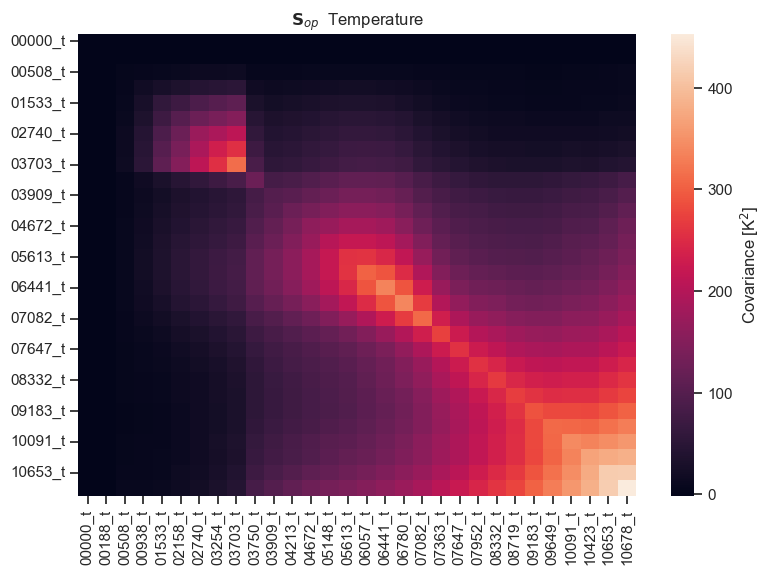

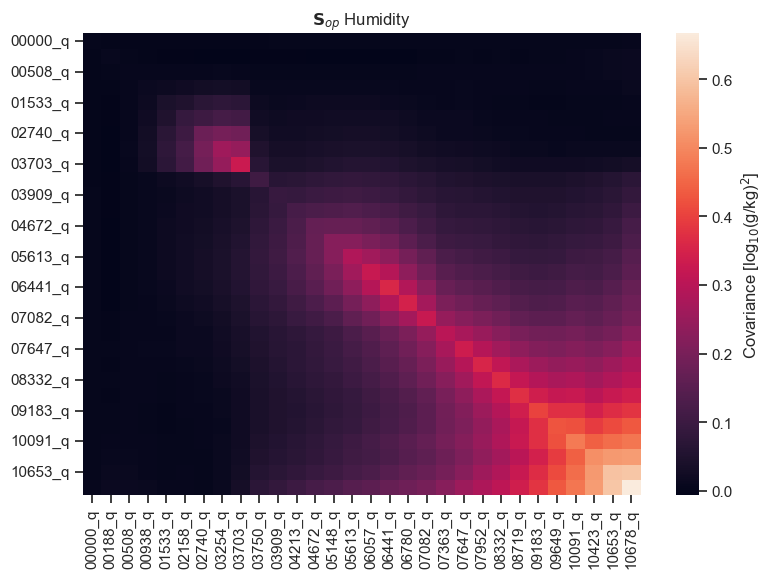

In [50]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbf{S}_{op}$  Temperature')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbf{S}_{op}$ Humidity')

In [51]:
oe_ref.x_op_err

00000_q     0.046824
00000_t     0.120810
00188_q     0.088968
00188_t     0.317281
00508_q     0.074790
00508_t     2.120366
00938_q     0.116357
00938_t     4.306543
01533_q     0.206776
01533_t     7.627195
02158_q     0.297079
02158_t    10.053117
02740_q     0.422837
02740_t    13.146030
03254_q     0.510596
03254_t    15.263020
03703_q     0.572379
03703_t    17.698497
03750_q     0.322819
03750_t    11.123458
03909_q     0.304659
03909_t     9.981464
04213_q     0.345310
04213_t    11.095301
04672_q     0.411413
04672_t    12.706977
05148_q     0.470056
05148_t    14.272083
05613_q     0.534471
05613_t    16.014762
06057_q     0.569671
06057_t    17.435443
06441_q     0.597229
06441_t    18.309049
06780_q     0.590092
06780_t    18.421382
07082_q     0.569606
07082_t    17.618002
07363_q     0.550305
07363_t    16.499550
07647_q     0.577082
07647_t    16.008451
07952_q     0.596495
07952_t    16.023313
08332_q     0.603593
08332_t    16.298256
08719_q     0.611713
08719_t    16

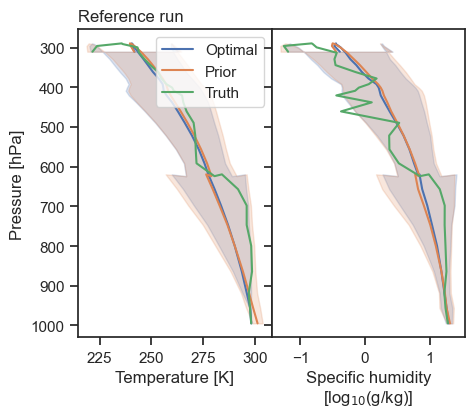

In [52]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='Reference run')

In [53]:
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_truth)

print('RMS X Temperature: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('RMS X Humidity: %g [log$_{10}$(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))
print('RMS Y %g [K]'% np.sqrt(np.mean((oe_ref.y_obs - oe_ref.y_op)**2)))

RMS X Temperature: 6.93971 [K]
RMS X Humidity: 2.63695 [log$_{10}$(g/kg)]
RMS Y 0.00783355 [K]


In [54]:
chiSquareTest = oe_ref.chiSquareTest(significance=0.05)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       


In [55]:
print('\nTests passed:\n' ,chiSquareTest[0])


Tests passed:
 chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [57]:
# linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
# print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)



In [58]:
x_a = x_mean.sel(season='JJA').to_pandas()  # as before
S_a = x_cov.sel(season='JJA')  # as before
S_a_diag = np.diag(np.diag(S_a))

In [59]:
oe_diag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a_diag,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_diag.doRetrieval()

0.33 s, iteration 1, degrees of freedom: 2.37 of 60, converged (x-space):  0.546


0.50 s, iteration 2, degrees of freedom: 2.37 of 60, done.  0.000


True

In [60]:
oe_diag.dgf, oe_ref.dgf

(2.3654621217664675, 2.189558288538575)

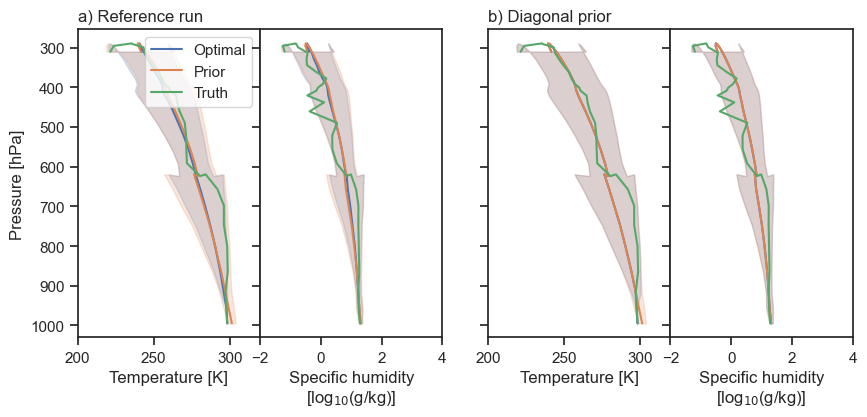

In [61]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)


In [62]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Diagonal prior:')
supporting_routines.print_mwr_rms(oe_diag)


Reference run:
RMS X Temperature: 6.93971 [K]
RMS X Humidity: 2.63695 [log$_{10}$(g/kg)]
RMS Y 0.00783355 [K]
Diagonal prior:
RMS X Temperature: 6.77947 [K]
RMS X Humidity: 2.9856 [log$_{10}$(g/kg)]
RMS Y 0.00171438 [K]


In [63]:
print(oe_diag.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [64]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_diag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

warning, negative absorption coefficient
warning, negative absorption coefficient
Linearity test passed:  True


In [65]:
x_a = x_mean.sel(season='MAM').to_pandas()
S_a = x_cov.sel(season='MAM').to_pandas()
forwardKwArgs = dict(
    pressure=pressure.loc['MAM'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [66]:
oe_sum = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_sum.doRetrieval()

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.50 s, iteration 2, degrees of freedom: 2.20 of 60, done.  0.000


True

In [67]:
oe_ref.dgf, oe_sum.dgf

(2.189558288538575, 2.2020431054535625)

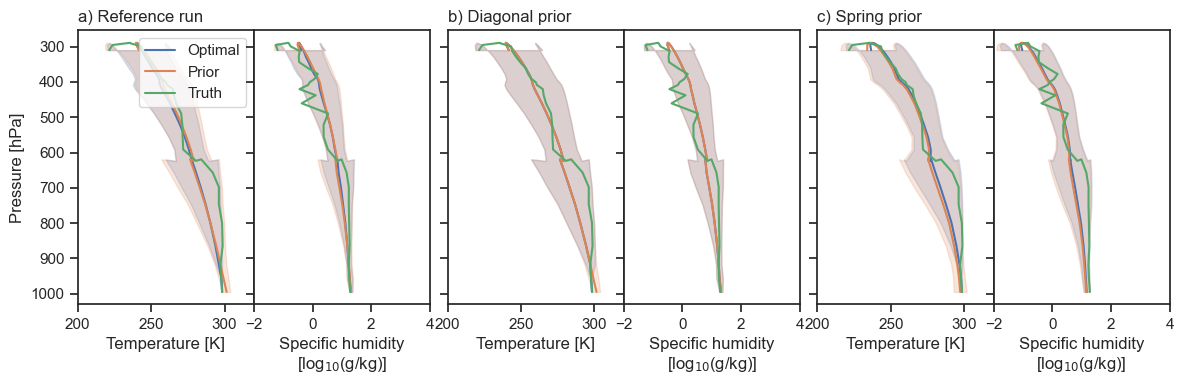

In [68]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    oe3 = oe_sum,
    h=pressure.loc['JJA'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    title3='c) Spring prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)
fig.tight_layout()
fig.savefig('Figure2.png', dpi=200)
fig.savefig('Figure2.pdf')

In [69]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Autumn prior:')
supporting_routines.print_mwr_rms(oe_sum)

Reference run:
RMS X Temperature: 6.93971 [K]
RMS X Humidity: 2.63695 [log$_{10}$(g/kg)]
RMS Y 0.00783355 [K]
Autumn prior:
RMS X Temperature: 5.62424 [K]
RMS X Humidity: 4.16281 [log$_{10}$(g/kg)]
RMS Y 0.00510188 [K]


In [70]:
print(oe_sum.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [71]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_sum.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

In [72]:
S_b = pd.DataFrame(
    np.array([
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 3.0, 3.3, 1.2, 0.1, 0.0, 0.0, 0.0],
        [0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.7, 8.7, 9.2, 3.3, 0.3, 0.0, 0.0, 0.0],
        [0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.7, 8.2, 8.7, 3.0, 0.3, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.7, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    ]),
    index=frequencies[::-1],
    columns=frequencies)

Text(0.5, 1.0, "Model uncertainty $\\mathbf{S}_{b}$' (Cimini et al. 2018)")

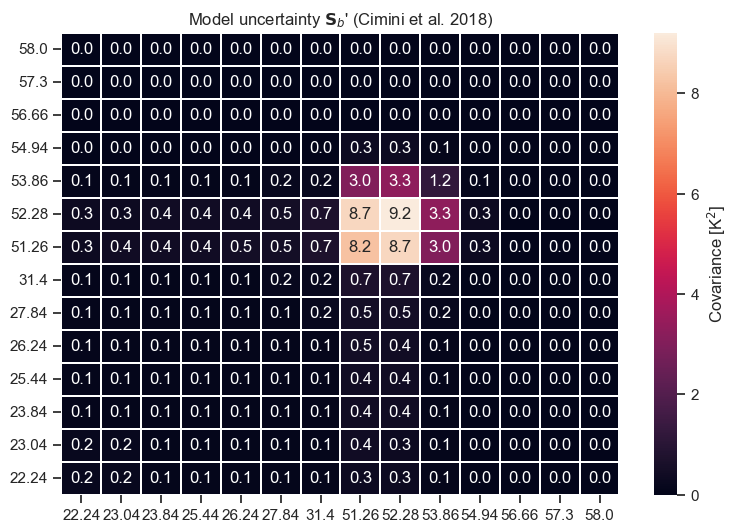

In [73]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_b, 
    annot=True, 
    linewidths=.05, 
    ax=ax, 
    fmt='.1f', 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r"Model uncertainty $\mathbf{S}_{b}$' (Cimini et al. 2018)")

In [74]:
x_a = x_mean.sel(season='JJA').to_pandas() # as for the reference run
S_a = x_cov.sel(season='JJA').to_pandas() # as for the reference run
S_e = S_y + S_b

assert (S_e.values == S_e.values.T).all()

forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_b = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_b.doRetrieval()

0.32 s, iteration 1, degrees of freedom: 1.92 of 60, converged (x-space):  0.012


0.47 s, iteration 2, degrees of freedom: 1.92 of 60, done.  0.000


True

In [75]:
oe_ref.dgf, oe_b.dgf

(2.189558288538575, 1.9179386666656053)

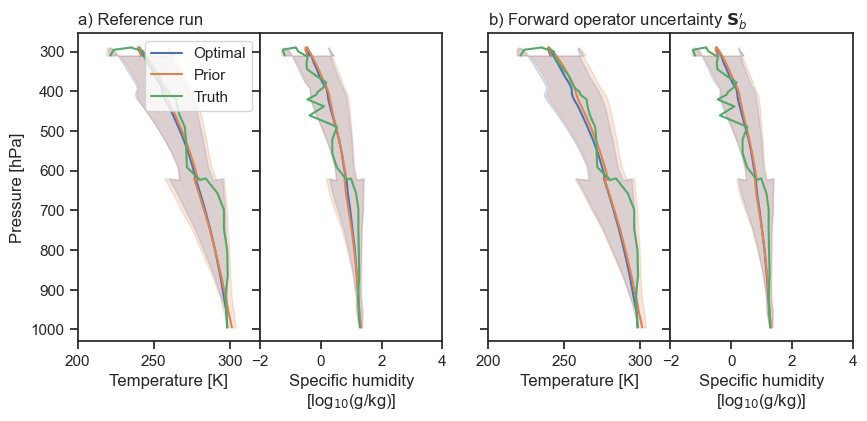

In [76]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_b,
    h=pressure.loc['JJA'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2="b) Forward operator uncertainty $\mathbf{S}_b'$",
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [77]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Concidering forward model error:')
supporting_routines.print_mwr_rms(oe_b)


Reference run:
RMS X Temperature: 6.93971 [K]
RMS X Humidity: 2.63695 [log$_{10}$(g/kg)]
RMS Y 0.00783355 [K]
Concidering forward model error:
RMS X Temperature: 7.21236 [K]
RMS X Humidity: 2.85432 [log$_{10}$(g/kg)]
RMS Y 0.0255248 [K]


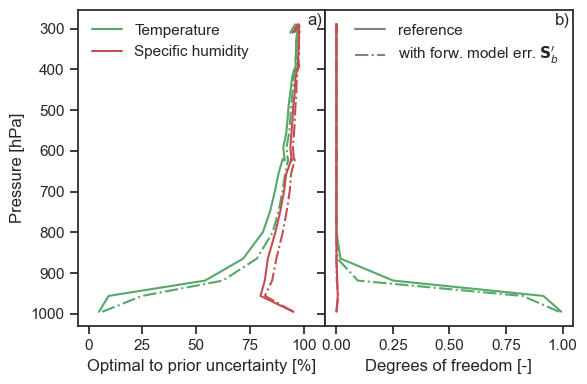

In [78]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_b, 'with forw. model err. $\mathbf{S}_b\'$',
    pressure.loc['JJA'] / 100,
)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('Figure3.png', dpi=200)
fig.savefig('Figure3.pdf')

In [79]:
((oe_b.x_op_err/oe_b.x_a_err) - (oe_ref.x_op_err/oe_ref.x_a_err)).max() * 100

15.563382643866081

In [80]:
print('Change in degrees of freedom for temperature variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[0].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[0].sum()))
print('Change in degrees of freedom for humidity variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[1].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[1].sum()))

Change in degrees of freedom for temperature variables 0.271655
Change in degrees of freedom for humidity variables -3.55571e-05


In [82]:
# print(oe_b.chiSquareTest()[0])
# linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
# print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

In [83]:
x_a = x_mean.sel(season='JJA').to_pandas() # as reference
S_a = x_cov.sel(season='JJA').to_pandas() # as reference
S_e = S_y * 4
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_double = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_double.doRetrieval()

0.32 s, iteration 1, degrees of freedom: 2.00 of 60, converged (x-space):  0.077


0.49 s, iteration 2, degrees of freedom: 2.00 of 60, done.  0.000


True

In [84]:
S_e = S_y / 4

oe_half = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_half.doRetrieval()

0.37 s, iteration 1, degrees of freedom: 2.51 of 60, converged (x-space):  1.432


0.53 s, iteration 2, degrees of freedom: 2.51 of 60, done.  0.000


True

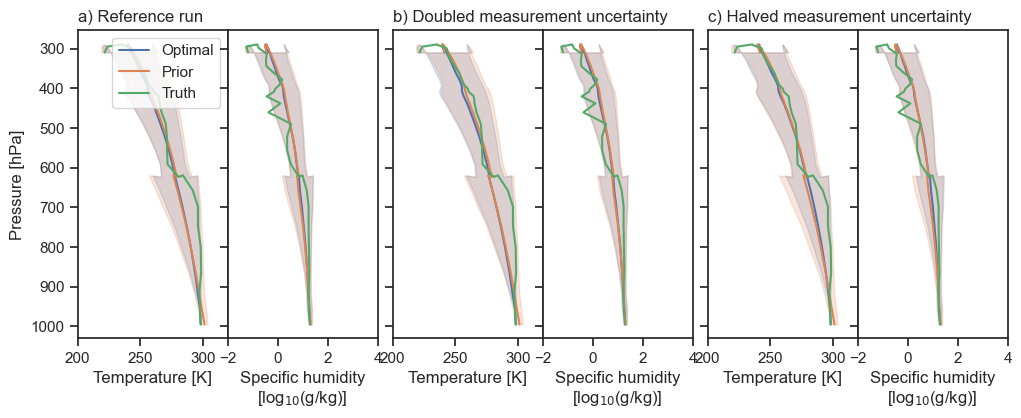

In [85]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_double,
    oe3 = oe_half,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Doubled measurement uncertainty',
    title3='c) Halved measurement uncertainty',
    xlimT = (200, 320),
    xlimH = (-2, 4),
)

In [86]:
print('### Reference run ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Doubled measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_double.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_double.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Halved measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_half.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_half.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))


### Reference run ###
Temperature RMS difference to x_a: 1.48229 [K]
Humidity RMS difference to x_a: 0.409257 [log10(g/kg)]

### Doubled measurement uncertainty ###
Temperature RMS difference to x_a: 1.71557 [K]
Humidity RMS difference to x_a: 0.309685 [log10(g/kg)]

### Halved measurement uncertainty ###
Temperature RMS difference to x_a: 1.40656 [K]
Humidity RMS difference to x_a: 0.704472 [log10(g/kg)]


Change in degrees of freedom for halved measurement uncertainties -0.318583
Change in degrees of freedom for doubled measurement uncertainties 0.186215


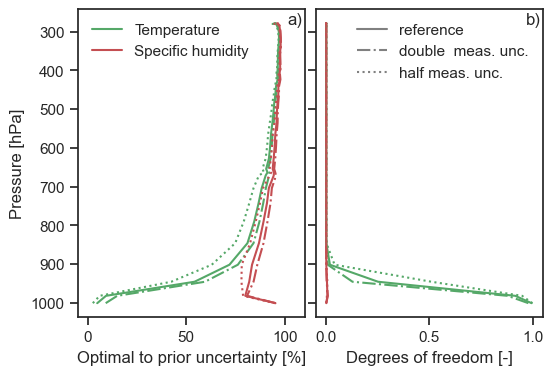

In [87]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_double, 'double  meas. unc.',
    pressure.loc['MAM'] / 100,
    oe3=oe_half, label3 = 'half meas. unc.'
)

print('Change in degrees of freedom for halved measurement uncertainties %g' %
      (oe_ref.dgf - oe_half.dgf))
print('Change in degrees of freedom for doubled measurement uncertainties %g' %
      (oe_ref.dgf - oe_double.dgf))


In [103]:
# print(oe_double.chiSquareTest()[0])
# linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_double.linearityTest(significance=0.05)
# print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

In [105]:
# print(oe_half.chiSquareTest()[0])
# linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_half.linearityTest(significance=0.05)
# print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$ including non-diagonal elements.')

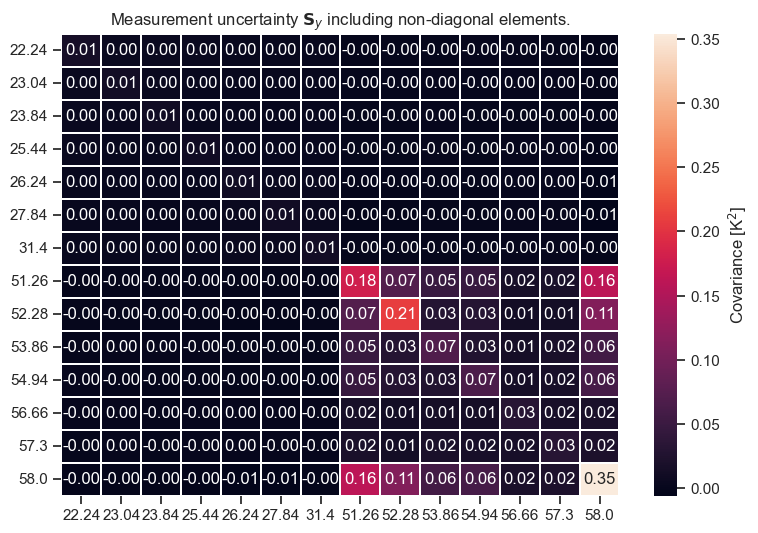

In [106]:
S_y_nondiag = np.array(
    [[
        1.4464e-02, 3.1175e-03, 3.2584e-03, 2.7590e-03, 2.1494e-03, 1.8121e-03,
        2.3444e-03, -2.8253e-03, -1.1941e-03, -7.1487e-04, -7.1019e-05,
        -1.3676e-04, -3.0526e-04, -3.8639e-03
    ],
     [
         3.1175e-03, 1.1803e-02, 2.5663e-03, 2.1457e-03, 1.5946e-03,
         1.6916e-03, 1.8975e-03, -7.3124e-04, -4.7555e-04, 1.8126e-04,
         -8.1855e-04, 4.6114e-04, 3.1963e-06, -2.5867e-03
     ],
     [
         3.2584e-03, 2.5663e-03, 1.0841e-02, 2.3239e-03, 1.1311e-03,
         1.1062e-03, 1.5767e-03, -6.4790e-04, -1.3201e-03, 1.7669e-04,
         -1.0165e-03, -4.5220e-04, -5.8443e-04, -1.9019e-03
     ],
     [
         2.7590e-03, 2.1457e-03, 2.3239e-03, 8.4360e-03, 1.3579e-03,
         1.5264e-03, 1.4780e-03, -8.7548e-04, -1.5626e-03, -1.7332e-04,
         -4.6437e-04, -1.8432e-04, -1.7265e-04, -3.8433e-03
     ],
     [
         2.1494e-03, 1.5946e-03, 1.1311e-03, 1.3579e-03, 1.0352e-02,
         3.3218e-03, 3.1755e-03, -2.2734e-03, -2.3389e-03, -1.2198e-03,
         -7.2950e-04, 2.0710e-04, 2.5822e-04, -5.9091e-03
     ],
     [
         1.8121e-03, 1.6916e-03, 1.1062e-03, 1.5264e-03, 3.3218e-03,
         1.0172e-02, 3.2801e-03, -2.0768e-03, -2.1563e-03, -4.6483e-04,
         -1.6465e-03, 9.4358e-05, -2.8649e-04, -5.4612e-03
     ],
     [
         2.3444e-03, 1.8975e-03, 1.5767e-03, 1.4780e-03, 3.1755e-03,
         3.2801e-03, 1.1026e-02, -3.1658e-04, -1.1692e-03, -7.5206e-04,
         -1.0920e-03, -3.7627e-05, -2.0978e-04, -1.7690e-03
     ],
     [
         -2.8253e-03, -7.3124e-04, -6.4790e-04, -8.7548e-04, -2.2734e-03,
         -2.0768e-03, -3.1658e-04, 1.7896e-01, 7.2248e-02, 4.8262e-02,
         4.6481e-02, 1.6283e-02, 1.8456e-02, 1.6027e-01
     ],
     [
         -1.1941e-03, -4.7555e-04, -1.3201e-03, -1.5626e-03, -2.3389e-03,
         -2.1563e-03, -1.1692e-03, 7.2248e-02, 2.0847e-01, 2.8595e-02,
         2.9832e-02, 1.1226e-02, 1.3614e-02, 1.1240e-01
     ],
     [
         -7.1487e-04, 1.8126e-04, 1.7669e-04, -1.7332e-04, -1.2198e-03,
         -4.6483e-04, -7.5206e-04, 4.8262e-02, 2.8595e-02, 6.9126e-02,
         2.5361e-02, 1.3994e-02, 1.8141e-02, 5.6810e-02
     ],
     [
         -7.1019e-05, -8.1855e-04, -1.0165e-03, -4.6437e-04, -7.2950e-04,
         -1.6465e-03, -1.0920e-03, 4.6481e-02, 2.9832e-02, 2.5361e-02,
         6.5223e-02, 1.3962e-02, 1.6982e-02, 6.0963e-02
     ],
     [
         -1.3676e-04, 4.6114e-04, -4.5220e-04, -1.8432e-04, 2.0710e-04,
         9.4358e-05, -3.7627e-05, 1.6283e-02, 1.1226e-02, 1.3994e-02,
         1.3962e-02, 3.1456e-02, 1.7948e-02, 1.8197e-02
     ],
     [
         -3.0526e-04, 3.1963e-06, -5.8443e-04, -1.7265e-04, 2.5822e-04,
         -2.8649e-04, -2.0978e-04, 1.8456e-02, 1.3614e-02, 1.8141e-02,
         1.6982e-02, 1.7948e-02, 3.0822e-02, 2.1850e-02
     ],
     [
         -3.8639e-03, -2.5867e-03, -1.9019e-03, -3.8433e-03, -5.9091e-03,
         -5.4612e-03, -1.7690e-03, 1.6027e-01, 1.1240e-01, 5.6810e-02,
         6.0963e-02, 1.8197e-02, 2.1850e-02, 3.5390e-01
     ]])

S_y_nondiag = pd.DataFrame(
    S_y_nondiag,
    index=y_vars,
    columns=y_vars,
)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_y_nondiag, annot=True, fmt='.2f', ax=ax, linewidths=.05, cbar_kws={'label':'Covariance [K$^2$]'})

ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$ including non-diagonal elements.')



In [107]:
x_a = x_mean.sel(season='JJA').to_pandas()[x_vars] # as reference run
S_a = x_cov.sel(season='JJA').to_pandas().loc[x_vars, x_vars] # as reference run
S_e = S_y_nondiag

forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_nondiag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_nondiag.doRetrieval()

0.34 s, iteration 1, degrees of freedom: 2.16 of 60, converged (x-space):  0.168


0.51 s, iteration 2, degrees of freedom: 2.16 of 60, done.  0.000


True

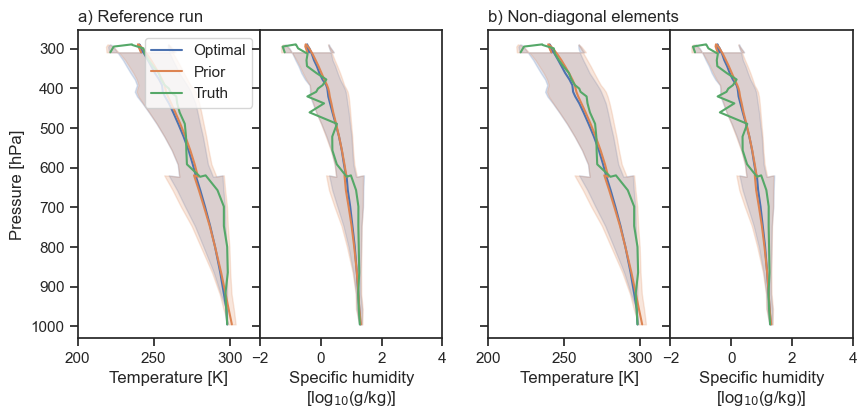

In [91]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_nondiag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Non-diagonal elements',
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [92]:
oe_nondiag.dgf - oe_ref.dgf

-0.03283462681254434

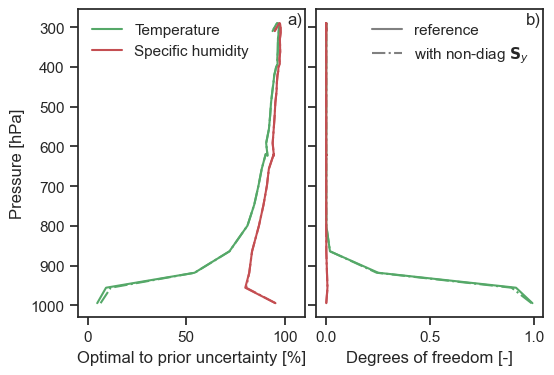

In [93]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_nondiag, 'with non-diag $\mathbf{S}_y$',
    pressure.loc['JJA'] / 100,
)

In [95]:
# print(oe_nondiag.chiSquareTest()[0])
# linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_nondiag.linearityTest(significance=0.05)
# print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

In [96]:
x_a = x_mean.sel(season='JJA').to_pandas()  # as reference run
S_a = x_cov.sel(season='JJA').to_pandas()   # as reference run

In [97]:
oe_testy = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
    convergenceTest='y'
)
oe_testy.doRetrieval()

0.33 s, iteration 1, degrees of freedom: 2.19 of 60, not converged (y-space):  1499.842


0.49 s, iteration 2, degrees of freedom: 2.19 of 60, converged (y-space):  0.006
0.66 s, iteration 3, degrees of freedom: 2.19 of 60, done.  0.000


True

In [98]:
oe_testy.dgf, oe_ref.dgf

(2.1895273118534337, 2.189558288538575)

In [99]:
print('Reference run with test in x-space:')
supporting_routines.print_mwr_rms(oe_ref)
print('Test in y-space:')
supporting_routines.print_mwr_rms(oe_testy)


Reference run with test in x-space:
RMS X Temperature: 6.93971 [K]
RMS X Humidity: 2.63695 [log$_{10}$(g/kg)]
RMS Y 0.00783355 [K]
Test in y-space:
RMS X Temperature: 6.94086 [K]
RMS X Humidity: 2.63726 [log$_{10}$(g/kg)]
RMS Y 0.0078327 [K]


In [100]:
print(oe_testy.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [102]:
# linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_testy.linearityTest(significance=0.05)
# print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)